In [1]:
# Importing modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from pyproj import CRS
import contextily as ctx

In [2]:
# Reading data
data = gpd.read_file(r"docs/JH_Keraysautojen_pysahtymispaikat_2020_syksy.shp")
data

,Vko,Viikonpva,Pvm,Klo,Osoite,Postinro,Kunta,Adress_sv,Adress_eng,Leveyspiir,Pituuspiir,geometry
0,36,Torstai,03.09.2020,19.20–20.00,"Allastie, uimalan pysäköintialue",00560,Helsinki,"Bassängvägen, friluftsbadens parkeringsområde","Allastie, parking lot of the outdoor swimming...",6.677395e+06,2.549779e+07,POINT (25497791.652 6677395.457)
1,36,Torstai,03.09.2020,18.00–18.40,"Sampsantie/Pellervontie, Akseli Toivosen kenttä",00610,Helsinki,"Sampsavägen/Pellervovägen, Akseli Toivonens plan","Sampsantie/Pellervontie, Akseli Toivosen kenttä",6.677902e+06,2.549712e+07,POINT (25497121.251 6677902.308)
2,36,Torstai,03.09.2020,17.00–17.40,"Pikkukoskentie, uimarannan pysäköintialue",00650,Helsinki,"Lillforsvägen, simstrandens parkeringsområde","Pikkukoskentie, parking lot of the beach",6.679474e+06,2.549895e+07,POINT (25498952.700 6679473.518)
3,36,Torstai,03.09.2020,20.20–20.50,"Holmanniitynkuja 10, Friisilän koulu",02240,Espoo,"Holmängsgränden 10, skola","Holmanniitynkuja 10, Friisilän koulu",6.673070e+06,2.548375e+07,POINT (25483745.948 6673069.571)
4,36,Torstai,03.09.2020,19.40–20.10,"Kuitinkuja 4, Kuitinmäen koulu",02210,Espoo,"Kvisgränden 4, skola","Kuitinkuja 4, Kuitinmäen koulu",6.672759e+06,2.548487e+07,POINT (25484873.871 6672758.684)
...,...,...,...,...,...,...,...,...,...,...,...,...
287,43,Torstai,22.10.2020,17.40–18.10,"Satutie/Tarinatie, pysäköintialue",01390,Vantaa,"Sagovägen/Mytvägen, parkeringsområde","Satutie/Tarinatie, parking lot",6.691073e+06,2.550112e+07,POINT (25501120.484 6691072.833)
288,44,Maanantai,26.10.2020,17.30–18.00,"Sokeritehtaantie 9, kauppa",02460,Kirkkonummi,"Sockerbruksvägen 9, butik","Sokeritehtaantie 9, shop",6.664502e+06,2.546639e+07,POINT (25466385.459 6664502.169)
289,44,Maanantai,26.10.2020,18.20–18.50,"Munkinmäentie 29, kaupan pysäköintialue",02400,Kirkkonummi,"Munkkullavägen 29, Prisma parkeringsområdet","Munkinmäentie 29, parking lot of the shop",6.667296e+06,2.546934e+07,POINT (25469342.549 6667296.352)
290,44,Maanantai,26.10.2020,19.10–19.40,"Överbyntie 174/Lindalintie, palokunta",02400,Kirkkonummi,"Överbyvägen 174/Lindalsvägen, brandstation","Överbyntie 174/Lindalintie, fire brigade",6.667874e+06,2.546728e+07,POINT (25467275.521 6667873.510)


In [3]:
# Subsetting data
data = data.loc[data["Kunta"] == "Helsinki"]


In [4]:
# Choosing columns
data = data[["Osoite", "Postinro", "geometry"]]
data

,Osoite,Postinro,geometry
0,"Allastie, uimalan pysäköintialue",00560,POINT (25497791.652 6677395.457)
1,"Sampsantie/Pellervontie, Akseli Toivosen kenttä",00610,POINT (25497121.251 6677902.308)
2,"Pikkukoskentie, uimarannan pysäköintialue",00650,POINT (25498952.700 6679473.518)
8,"Ratavallintie 1, entinen bussin kääntöpaikka",00720,POINT (25499701.931 6680973.266)
9,"Moreenitie 1, Pihlajamäen ostoskeskus",00710,POINT (25500685.424 6680127.445)
...,...,...,...
251,"Hakaniemenranta, Hakaniemen sillan alla",00530,POINT (25497613.043 6673883.192)
254,"Viikinportinkatu, kääntöpaikka",00790,POINT (25500449.254 6679474.732)
261,Jokisuuntie 8,00560,POINT (25499358.468 6678294.419)
262,Eerik Pyhän kuja/Ristiretkeläistenkatu,00710,POINT (25499270.254 6679306.205)


In [5]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))
pop

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...,3342,108,45,11,23,6,7,26,17,8,6,4
1,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...,3503,273,35,35,24,52,62,40,26,25,9,0
2,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...,3660,239,34,46,24,24,45,33,30,25,10,2
3,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...,3661,202,30,52,37,13,36,43,11,4,3,3
4,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...,3662,261,30,64,32,36,64,34,20,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,MULTIPOLYGON Z (((25508750.000 6676998.999 0.0...,24229,634,31,87,38,137,108,104,70,50,33,7
3163,MULTIPOLYGON Z (((25508750.000 6676749.000 0.0...,24230,659,38,51,47,57,79,82,94,123,90,36
3164,MULTIPOLYGON Z (((25508750.000 6676499.001 0.0...,24231,130,51,4,2,8,15,15,24,29,23,10
3165,MULTIPOLYGON Z (((25510249.994 6683749.006 0.0...,25174,100,48,6,32,9,3,16,31,1,2,0


In [6]:
# Subsetting data
pop = pop[["asukkaita", "geometry"]]
pop

,asukkaita,geometry
0,108,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...
1,273,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...
2,239,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...
3,202,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...
4,261,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...
...,...,...
3162,634,MULTIPOLYGON Z (((25508750.000 6676998.999 0.0...
3163,659,MULTIPOLYGON Z (((25508750.000 6676749.000 0.0...
3164,130,MULTIPOLYGON Z (((25508750.000 6676499.001 0.0...
3165,100,MULTIPOLYGON Z (((25510249.994 6683749.006 0.0...


In [7]:
# Checking layers crs
pop = pop.set_crs(epsg=3879)
pop = pop.to_crs(epsg=3857)
data = data.to_crs(epsg=3857)

In [8]:
pop.crs == data.crs

True

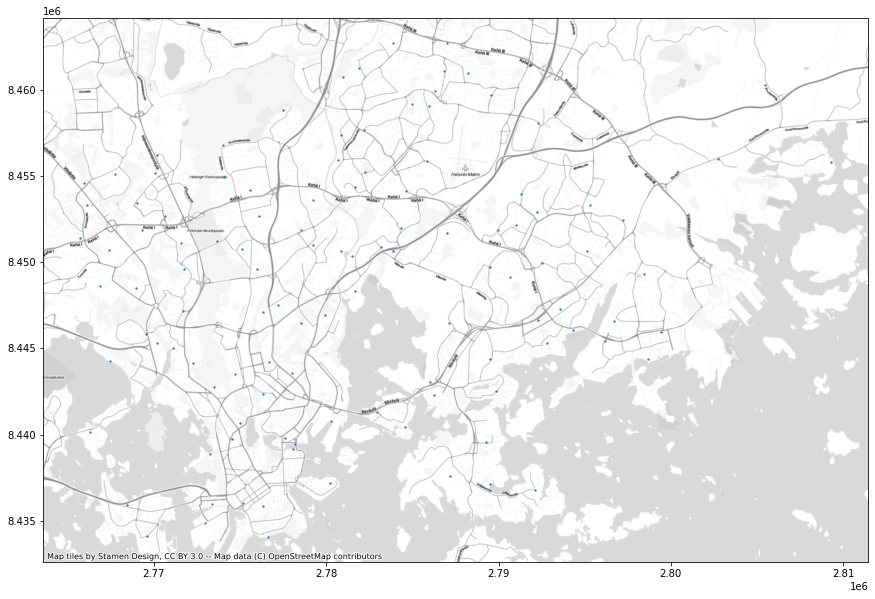

In [9]:
# Checking where the points are
fig, ax = plt.subplots(figsize=(16, 10))
data.plot(ax=ax, markersize=1.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [10]:
# Creating a buffer
data["buffer"] = data.buffer(750)

In [11]:
data["geometry"] = data["buffer"]
data

,Osoite,Postinro,geometry,buffer
0,"Allastie, uimalan pysäköintialue",00560,"POLYGON ((2779303.637 8446490.425, 2779300.026...","POLYGON ((2779303.637 8446490.425, 2779300.026..."
1,"Sampsantie/Pellervontie, Akseli Toivosen kenttä",00610,"POLYGON ((2777956.894 8447508.840, 2777953.282...","POLYGON ((2777956.894 8447508.840, 2777953.282..."
2,"Pikkukoskentie, uimarannan pysäköintialue",00650,"POLYGON ((2781633.443 8450671.645, 2781629.831...","POLYGON ((2781633.443 8450671.645, 2781629.831..."
8,"Ratavallintie 1, entinen bussin kääntöpaikka",00720,"POLYGON ((2783138.260 8453690.255, 2783134.648...","POLYGON ((2783138.260 8453690.255, 2783134.648..."
9,"Moreenitie 1, Pihlajamäen ostoskeskus",00710,"POLYGON ((2785114.403 8451987.734, 2785110.792...","POLYGON ((2785114.403 8451987.734, 2785110.792..."
...,...,...,...,...
251,"Hakaniemenranta, Hakaniemen sillan alla",00530,"POLYGON ((2778949.641 8439430.378, 2778946.030...","POLYGON ((2778949.641 8439430.378, 2778946.030..."
254,"Viikinportinkatu, kääntöpaikka",00790,"POLYGON ((2784639.737 8450674.336, 2784636.125...","POLYGON ((2784639.737 8450674.336, 2784636.125..."
261,Jokisuuntie 8,00560,"POLYGON ((2782448.969 8448299.694, 2782445.358...","POLYGON ((2782448.969 8448299.694, 2782445.358..."
262,Eerik Pyhän kuja/Ristiretkeläistenkatu,00710,"POLYGON ((2782271.415 8450335.150, 2782267.803...","POLYGON ((2782271.415 8450335.150, 2782267.803..."


In [12]:
# Performing a spatial join
join = gpd.sjoin(pop, data, how="inner", op="within")

# Grouping the data by name
grouped = join.groupby("Osoite")


In [13]:
join

,asukkaita,geometry,index_right,Osoite,Postinro,buffer
1075,211,MULTIPOLYGON Z (((2765408.895 8451205.217 0.00...,188,Kylväjäntie/Äestäjäntie,00390,"POLYGON ((2766493.547 8451392.214, 2766489.935..."
1105,134,MULTIPOLYGON Z (((2765911.127 8451206.403 0.00...,188,Kylväjäntie/Äestäjäntie,00390,"POLYGON ((2766493.547 8451392.214, 2766489.935..."
1102,816,MULTIPOLYGON Z (((2765907.625 8452715.767 0.00...,189,"Ristipellonkuja 1, pysäköintialue",00390,"POLYGON ((2766895.076 8453315.496, 2766891.465..."
1109,192,MULTIPOLYGON Z (((2765936.760 8440147.108 0.00...,230,"Lehtisaarentie 1, ostoskeskuksen pysäköintialue",00340,"POLYGON ((2767022.426 8440142.234, 2767018.814..."
1110,265,MULTIPOLYGON Z (((2765937.923 8439644.808 0.00...,230,"Lehtisaarentie 1, ostoskeskuksen pysäköintialue",00340,"POLYGON ((2767022.426 8440142.234, 2767018.814..."
...,...,...,...,...,...,...
3116,504,MULTIPOLYGON Z (((2798049.301 8448695.880 0.00...,71,Mustalahdentie/Neitsytsaarentie,00960,"POLYGON ((2799180.289 8449300.877, 2799176.677..."
3125,578,MULTIPOLYGON Z (((2798552.425 8449197.748 0.00...,71,Mustalahdentie/Neitsytsaarentie,00960,"POLYGON ((2799180.289 8449300.877, 2799176.677..."
3135,595,MULTIPOLYGON Z (((2798541.799 8444170.105 0.00...,68,"Kalkkihiekantie/Hiekkajaalanranta, Kalkkihieka...",00980,"POLYGON ((2799438.105 8444358.371, 2799434.493..."
3144,442,MULTIPOLYGON Z (((2799046.857 8445676.951 0.00...,69,"Vuotie 45, ostoskeskuksen pysäköintialue, ekop...",00980,"POLYGON ((2800191.849 8445961.890, 2800188.238..."


In [14]:
for group in grouped:
    print(group)
    break

('Agronominkatu 22, Latokartanon peruskoulu',       asukkaita                                           geometry  \
2321        726  MULTIPOLYGON Z (((2786503.193 8451728.526 0.00...   
2322        261  MULTIPOLYGON Z (((2786502.952 8451225.436 0.00...   

      index_right                                     Osoite Postinro  \
2321           11  Agronominkatu 22, Latokartanon peruskoulu    00790   
2322           11  Agronominkatu 22, Latokartanon peruskoulu    00790   

                                                 buffer  
2321  POLYGON ((2787739.094 8451668.219, 2787735.483...  
2322  POLYGON ((2787739.094 8451668.219, 2787735.483...  )


In [15]:
# For-looping the groupby object to find out how many people live within the 750 km buffer.
laskuri = 0
sanakirja = {}
for key, group in grouped:
    summa = group["asukkaita"].sum()
    # Adding the key-value pairs to a dictionary
    sanakirja[key] = summa
    

In [16]:
# Creating index for new dataframe
i = 0
lista = []
while i < len(sanakirja):
    lista.append(i)
    i += 1
    

In [18]:
# Creating a new dataframe from
df = pd.DataFrame(list(sanakirja.items()), index=lista)

In [19]:
# Renaming columns
df = df.rename(columns={0: "Osoite", 1: "pop18"})

In [20]:
df

,Osoite,pop18
0,"Agronominkatu 22, Latokartanon peruskoulu",987
1,"Aisatie/Juhtatie, Kehä III:n sillan alla",268
2,"Ajurinaukio, kirjaston edessä",633
3,"Allastie, uimalan pysäköintialue",196
4,"Aulangontie 12, pysäköintialue",340
...,...,...
98,"Vuotie 45, ostoskeskuksen pysäköintialue, ekop...",1291
99,"Ylermintie/Puistolantie, pysäköintialue",379
100,Yllästunturinkuja 1,610
101,"Ylä-Fallin kuja/Tasaisenpellontie, aukio",303


In [21]:
# Merging the datasets
merge = data.merge(df, on="Osoite")
merge

,Osoite,Postinro,geometry,buffer,pop18
0,"Allastie, uimalan pysäköintialue",00560,"POLYGON ((2779303.637 8446490.425, 2779300.026...","POLYGON ((2779303.637 8446490.425, 2779300.026...",196
1,"Sampsantie/Pellervontie, Akseli Toivosen kenttä",00610,"POLYGON ((2777956.894 8447508.840, 2777953.282...","POLYGON ((2777956.894 8447508.840, 2777953.282...",516
2,"Pikkukoskentie, uimarannan pysäköintialue",00650,"POLYGON ((2781633.443 8450671.645, 2781629.831...","POLYGON ((2781633.443 8450671.645, 2781629.831...",260
3,"Ratavallintie 1, entinen bussin kääntöpaikka",00720,"POLYGON ((2783138.260 8453690.255, 2783134.648...","POLYGON ((2783138.260 8453690.255, 2783134.648...",701
4,"Moreenitie 1, Pihlajamäen ostoskeskus",00710,"POLYGON ((2785114.403 8451987.734, 2785110.792...","POLYGON ((2785114.403 8451987.734, 2785110.792...",736
...,...,...,...,...,...
98,"Siltavuorenranta, Kirjanpuisto, rannan puolella",00170,"POLYGON ((2778801.475 8439141.179, 2778797.863...","POLYGON ((2778801.475 8439141.179, 2778797.863...",1759
99,"Viikinportinkatu, kääntöpaikka",00790,"POLYGON ((2784639.737 8450674.336, 2784636.125...","POLYGON ((2784639.737 8450674.336, 2784636.125...",279
100,Jokisuuntie 8,00560,"POLYGON ((2782448.969 8448299.694, 2782445.358...","POLYGON ((2782448.969 8448299.694, 2782445.358...",445
101,Eerik Pyhän kuja/Ristiretkeläistenkatu,00710,"POLYGON ((2782271.415 8450335.150, 2782267.803...","POLYGON ((2782271.415 8450335.150, 2782267.803...",104


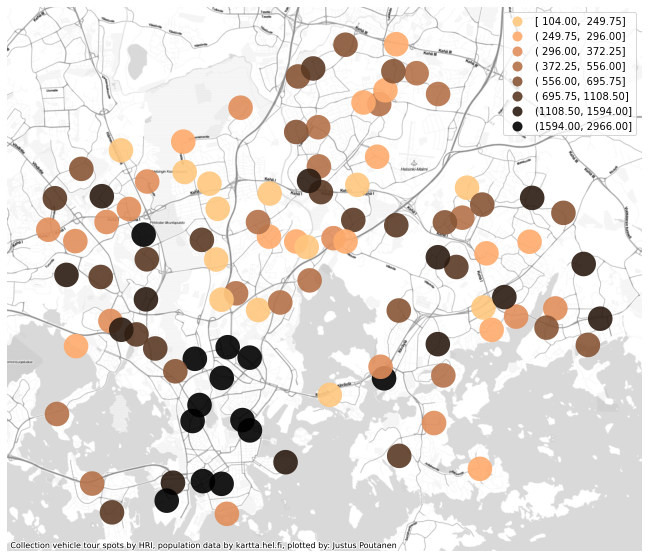

In [29]:
# Plotting the data
fig, ax = plt.subplots(figsize=(16, 10))

merge.plot(ax=ax,
           column="pop18",
           markersize=1.5,
           legend=True,
           alpha=0.9,
           cmap="copper_r",
           scheme="quantiles",
           k=8
)

# Removing axis
plt.axis("off")

# Credits
credits = "Collection vehicle tour spots by HRI, population data by kartta.hel.fi, plotted by: Justus Poutanen"

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, attribution=credits)

In [30]:
# Saving figure
outfp = r"docs/TrashZones.png"
fig.savefig(outfp)